In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from math import pi


In [2]:
## Reading the samptimes data
file = open('samptimes.csv')
samptimes = csv.reader(file)


stimes=[]
for row in samptimes:
    stimes.append(row[0])

file.close()

## Reading the y data
file = open('y.csv')
y = csv.reader(file)

Ydata=[]

for row in y:
    Ydata.append(row[0])
file.close()

In [3]:
## Converting the data to numpy array
stimes = np.asfarray(stimes)
X = np.asfarray(stimes).reshape([stimes.size,1])
print("X.sizeNp ",X.shape)
#X = np.hstack((np.ones((X.size,1)), X))
#print("Xshape>>>>>> = ",X.shape)

#X = np.expand_dims(X, axis=1)
#X_data= np.ones((X.shape[0],1))
#X_data=np.append(X_data, X, axis = 1)
#print(type(X[0]))
Y = np.asfarray(Ydata).reshape([X.shape[0],1])
print("Yshape = ",Y.shape)


X.sizeNp  (259, 1)
Yshape =  (259, 1)


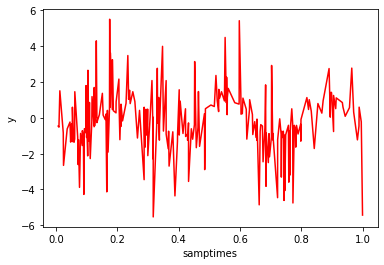

In [4]:
#plt.scatter(X, Y)
plt.plot(X,Y,'r')
plt.xlabel('samptimes')
plt.ylabel('y')
#plt.legend(["Observations", "Linear regression model"], loc ="lower right")
plt.show()


In [19]:
def matrix_producer(time_samples, N):
	rows, cols = (time_samples.shape[0], N)
	A = [] 
	B=np.int64((N-1)/2)
	for i in range(time_samples.shape[0]):
		for j in range(-B,B+1):
			A.append(np.exp(time_samples[i]*j*2*pi*1j))

	A = np.asarray(A).reshape((time_samples.shape[0], N))
	#print(A.shape)
	#print(A)
	return A


In [20]:
A = matrix_producer(X,21)    #here X is the samp_times vector
#print(X.shape)
#print(A)
fourier_coeff=np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,Y))
#print(fourier_coeff.shape)

(259, 21)
[[0.88169032-0.47182854j 0.90380077-0.42795345j 0.92372955-0.38304533j
  ... 0.92372955+0.38304533j 0.90380077+0.42795345j
  0.88169032+0.47182854j]
 [0.79640511-0.60476351j 0.83397594-0.5518008j  0.86803022-0.49651136j
  ... 0.86803022+0.49651136j 0.83397594+0.5518008j
  0.79640511+0.60476351j]
 [0.67146815-0.74103342j 0.73090635-0.68247777j 0.78525623-0.61917094j
  ... 0.78525623+0.61917094j 0.73090635+0.68247777j
  0.67146815+0.74103342j]
 ...
 [0.74669093+0.66517114j 0.79307796+0.60912014j 0.83526685+0.54984478j
  ... 0.83526685-0.54984478j 0.79307796-0.60912014j
  0.74669093-0.66517114j]
 [0.95833763+0.28563786j 0.96620856+0.25776156j 0.9732688 +0.22966899j
  ... 0.9732688 -0.22966899j 0.96620856-0.25776156j
  0.95833763-0.28563786j]
 [0.99948988+0.03193702j 0.9995868 +0.02874425j 0.99967352+0.02555118j
  ... 0.99967352-0.02555118j 0.9995868 -0.02874425j
  0.99948988-0.03193702j]]


In [21]:
y_pred= np.dot(A,fourier_coeff)
y_pred

array([[-0.71786559-2.08166817e-16j],
       [-0.70632797-2.77555756e-16j],
       [-0.69180616-2.49800181e-16j],
       [-0.65720539-3.05311332e-16j],
       [-0.6573638 -2.49800181e-16j],
       [-0.72357418-2.39391840e-16j],
       [-0.85203395-5.55111512e-17j],
       [-0.88838541-1.38777878e-17j],
       [-0.9406829 -8.32667268e-17j],
       [-0.98555181-5.55111512e-17j],
       [-0.99454178+2.77555756e-17j],
       [-1.03976184-4.16333634e-17j],
       [-1.08735199-2.77555756e-17j],
       [-1.12343726-2.77555756e-17j],
       [-1.13057331+9.71445147e-17j],
       [-1.23660148+1.38777878e-17j],
       [-1.24384683+2.77555756e-17j],
       [-1.24752265+6.93889390e-18j],
       [-1.24773203-6.93889390e-18j],
       [-1.22930798-2.42861287e-17j],
       [-1.16261867-6.93889390e-17j],
       [-1.15522567-8.32667268e-17j],
       [-1.11999355+2.08166817e-17j],
       [-1.09073673-7.63278329e-17j],
       [-1.05266423-1.31838984e-16j],
       [-1.03090434-9.02056208e-17j],
       [-1.0

/home/shahabkhan/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


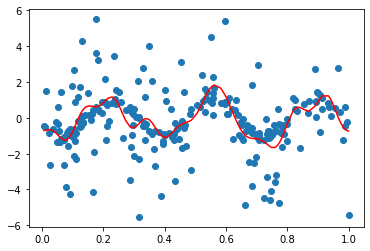

In [22]:
y_pred= (y_pred)
plt.plot(X,y_pred, color = 'r')
plt.scatter(X,Y)
plt.show()